In [1]:
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from parameters import parameters as pm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import timeit
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('samples_para_stress_nogamma_0.3.xlsx')

In [3]:
df.columns

Index([     8.817445392210471,      9.111934584124977,      6.471310204102217,
            18.23566705959941,     15.987423923127686,      19.88842337742436,
           17.837041635672804,      11.77053784095797,     130.33166671788842,
           135.60941708522708,     28.843831450422776,     25.809510078427273,
       '25.809510078427273.1',     34.121581817761424],
      dtype='object')

In [4]:
df.columns=['a','b','af','bf','as','bs','afs','bfs','sigma_fs_fs','sigma_sf_fs','sigma_fn_fn','sigma_nf_fn','sigma_ns_sn','sigma_sn_sn']

In [5]:
df.describe()

,a,b,af,bf,as,bs,afs,bfs,sigma_fs_fs,sigma_sf_fs,sigma_fn_fn,sigma_nf_fn,sigma_ns_sn,sigma_sn_sn
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,10.051099,10.050823,10.053594,10.041641,10.043808,10.040158,10.042038,10.048542,178.350820,178.381304,90.715406,87.716313,87.716313,90.745891
std,5.750127,5.750228,5.749374,5.744880,5.747095,5.741963,5.745040,5.749946,189.873744,190.027663,134.019507,134.127325,134.127325,134.088382
min,0.117477,0.113875,0.108680,0.104668,0.116491,0.117014,0.112519,0.112897,2.927617,2.192745,0.373244,0.081750,0.081750,0.718570
25%,5.082041,5.080430,5.072687,5.074195,5.073566,5.068185,5.079989,5.076965,42.586556,41.667422,11.546624,8.207926,8.207926,11.755472
50%,10.067975,10.059653,10.053391,10.032239,10.047240,10.030923,10.031350,10.043038,112.691696,113.219389,31.182852,27.767231,27.767231,30.699735
75%,15.025818,15.020589,15.028553,15.002848,15.000731,15.000922,15.003331,15.021940,246.185702,245.587514,106.894797,103.584309,103.584309,107.861213
max,19.999211,19.990205,19.993468,19.981656,19.981856,19.991570,19.999531,19.982412,1143.249039,1142.781355,823.425306,821.698519,821.698519,822.659595


In [6]:
df.head(5)

,a,b,af,bf,as,bs,afs,bfs,sigma_fs_fs,sigma_sf_fs,sigma_fn_fn,sigma_nf_fn,sigma_ns_sn,sigma_sn_sn
0,15.879576,4.159952,18.432657,6.590511,1.275284,17.763379,3.249814,14.432055,53.620344,50.026766,17.652018,13.477868,13.477868,14.058441
1,19.346514,5.294219,2.464606,5.090498,14.411597,7.663133,7.348228,10.170833,50.339927,53.321604,22.312189,21.804015,21.804015,25.293867
2,15.687301,16.772269,18.469567,12.036621,0.353089,4.004931,12.485190,10.862579,374.160408,368.349985,317.548742,311.670292,311.670292,311.738319
3,16.675272,1.142070,9.892195,18.662535,12.363900,6.646000,16.785761,8.013531,48.754795,46.800631,11.419433,6.655686,6.655686,9.465269
4,19.669904,9.310951,14.588875,1.671191,8.694459,13.916659,16.773651,7.465216,95.471325,96.154345,62.942049,60.512784,60.512784,63.625069


In [7]:
feature_columns=['sigma_fs_fs','sigma_sf_fs','sigma_fn_fn','sigma_nf_fn','sigma_ns_sn','sigma_sn_sn']
for col in feature_columns:
    df[col]=(df[col]-df[col].mean())/df[col].std()

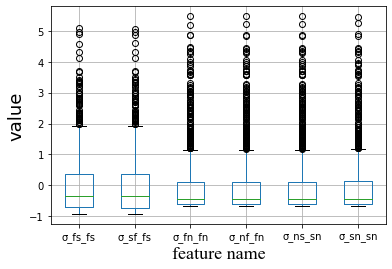

In [8]:
df[feature_columns].boxplot()
plt.gca().set_ylabel("value",fontdict={"size":18})
plt.gca().set_xlabel("feature name",fontdict={'family' : 'Times New Roman', 'size' : 18})
plt.xticks([1, 2, 3, 4, 5, 6], ['\u03C3_fs_fs', '\u03C3_sf_fs', '\u03C3_fn_fn','\u03C3_nf_fn','\u03C3_ns_sn','\u03C3_sn_sn'])
plt.show()

In [9]:
q_data,y_data=df.iloc[:,0:8],df.iloc[:,8:]


###################################
print(q_data,y_data)

             a          b         af         bf         as         bs  \
0    15.879576   4.159952  18.432657   6.590511   1.275284  17.763379   
1    19.346514   5.294219   2.464606   5.090498  14.411597   7.663133   
2    15.687301  16.772269  18.469567  12.036621   0.353089   4.004931   
3    16.675272   1.142070   9.892195  18.662535  12.363900   6.646000   
4    19.669904   9.310951  14.588875   1.671191   8.694459  13.916659   
..         ...        ...        ...        ...        ...        ...   
994  15.827084   2.665729   0.197564  15.889084  13.313109   7.161575   
995  17.208219   8.049773  15.616126  19.362978   2.359779   3.984448   
996  14.952819   1.025730   7.243429  12.259767   6.020937   2.777786   
997  10.206803   3.573229   0.607288   9.369758   7.952615  14.023122   
998   4.362268   2.580608  13.478074  17.055236  10.047240  16.682097   

           afs        bfs  
0     3.249814  14.432055  
1     7.348228  10.170833  
2    12.485190  10.862579  
3    16.785

In [10]:
train_size=int(0.9*len(q_data))

In [11]:
q_data_train,q_data_test=q_data.iloc[:train_size,:],q_data.iloc[train_size:,:]
y_data_train,y_data_test=y_data.iloc[:train_size,:],y_data.iloc[train_size:,:]

In [12]:
q_data_exp,y_data_exp=q_data.iloc[-1,:].values.reshape((1,-1)),y_data.iloc[-1,:].values.reshape((1,-1))
print(y_data_exp)

[[-0.86450282 -0.87235725 -0.61446618 -0.63537841 -0.63537841 -0.62627407]]


In [13]:
q_data_train.shape,q_data_test.shape,q_data_exp.shape,y_data_exp.shape

((899, 8), (100, 8), (1, 8), (1, 6))

In [14]:
q_data_exp

array([[ 4.36226752,  2.58060817, 13.47807383, 17.05523641, 10.04723986,
        16.68209683,  1.90688712,  9.29257046]])

In [15]:
class SklearnHelper(object):
    def __init__(self, clf, params=None,isMuilt_reg=False):
        if isMuilt_reg: self.clf= MultiOutputRegressor (clf(**params))
        else: self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def score(self,x,y):
        return self.clf.score(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [16]:
def mse_loss(y_true,y_pred):
    return np.mean(np.square(y_true-y_pred))

X = q_data_train.values
y = y_data_train.values
X_test = q_data_test.values
y_test=y_data_test.values

In [17]:
X.shape,y.shape,X_test.shape,y_test.shape

((899, 8), (899, 6), (100, 8), (100, 6))

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, Matern,RationalQuadratic

In [19]:
start = timeit.default_timer()
## not yet finished
#kernel = ConstantKernel(100, (1e-3, 1e3))*Matern(length_scale= 100, length_scale_bounds=(0.0,1e4),nu=2.5)
kernel = ConstantKernel(100, (1e-3, 1e3))*RBF(length_scale= 1.0, length_scale_bounds=(0.0,100))
# kernel = RBF(**gpr_para[feat_flag])

gpr_models=[]
for feat_flag in range(6):
    gpr_sub = GaussianProcessRegressor(kernel=kernel,
                    random_state=0)
    print('fitting feature %d' % feat_flag)
    gpr_sub.fit(X, y[:, feat_flag])
    print(gpr_sub.kernel_)
    gpr_models.append(gpr_sub)
stop = timeit.default_timer()

print('Time: ', stop - start)

fitting feature 0
11.9**2 * RBF(length_scale=26.4)
fitting feature 1
11.9**2 * RBF(length_scale=26.4)
fitting feature 2
14.9**2 * RBF(length_scale=28.5)
fitting feature 3
14.9**2 * RBF(length_scale=28.5)
fitting feature 4
14.9**2 * RBF(length_scale=28.5)
fitting feature 5
14.9**2 * RBF(length_scale=28.5)
Time:  41.030561199999994


In [20]:
# predicting the output and others using the selected hyperparameters
for feat_flag in range(6):
    print('fitting feature %d' % feat_flag)
    gpr_sub = gpr_models[feat_flag]
    pred = gpr_sub.predict(X_test)
    print('gpr Test: mse loss={:.6f} r2_score={:.6f}'.format(
        mse_loss(y_test[:, feat_flag], pred),metrics.r2_score(y_test[:, feat_flag], pred)))

fitting feature 0
gpr Test: mse loss=0.006126 r2_score=0.991505
fitting feature 1
gpr Test: mse loss=0.006118 r2_score=0.991488
fitting feature 2
gpr Test: mse loss=0.004523 r2_score=0.994570
fitting feature 3
gpr Test: mse loss=0.004516 r2_score=0.994581
fitting feature 4
gpr Test: mse loss=0.004516 r2_score=0.994581
fitting feature 5
gpr Test: mse loss=0.004516 r2_score=0.994574


In [21]:
y_pred=np.zeros(y_test.shape)
for ix, model in enumerate(gpr_models):
    y_pred[:, ix] += model.predict(X_test)

for feat_flag in range(6):
    loss_test = mse_loss(y_test[:, feat_flag], y_pred[:, feat_flag])
    R2_test  = metrics.r2_score(y_test[:, feat_flag], y_pred[:, feat_flag])
    print('Test: mse loss={:.6f} r2_score={:.6f}'.format(loss_test, R2_test))

Test: mse loss=0.006126 r2_score=0.991505
Test: mse loss=0.006118 r2_score=0.991488
Test: mse loss=0.004523 r2_score=0.994570
Test: mse loss=0.004516 r2_score=0.994581
Test: mse loss=0.004516 r2_score=0.994581
Test: mse loss=0.004516 r2_score=0.994574


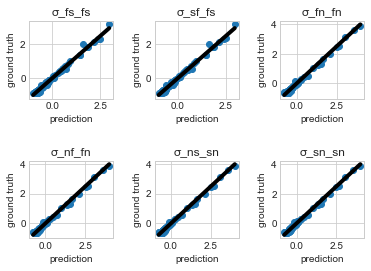

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.subplot(2,3,1)
feat_flag = 0;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_fs_fs')
#plt.show()

plt.subplot(2,3,2)
feat_flag = 1;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_sf_fs')
#plt.show()

plt.subplot(2,3,3)
feat_flag = 2;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_fn_fn')
#plt.show()

plt.subplot(2,3,4)
feat_flag = 3;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_nf_fn')
#plt.show()


plt.subplot(2,3,5)
feat_flag = 4;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_ns_sn')
#plt.show()

plt.subplot(2,3,6)
feat_flag = 5;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_sn_sn')
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace=0.8)
plt.show()

